1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

The null hypothesis (H_0: '15 belongs to a poisson distribution with mu = 6.3') has Z = 3.4661629670697414
Therefore has to be rejected at the given level of significance (assuming a N(0,1) distribution, Z = 3 corresponds to a value larger than 3 sigmas from the mean value, hence alpha = 0.0015)

To be more precise, we can integrate our Z distribution and see what is the maximum significance level at which we can accept the null hypothesis (i.e. the p-value)


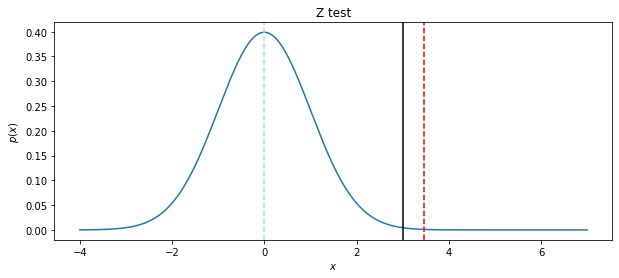

The p-value of this single-tailed test is  0.0002639715869149896


In [2]:
#definisci la normale con mu e sqrt(mu), plotta. mostra Z che viene e Z limite, integra, p value e mostra che è minore di alfa
#assuming a Poisson distribution, we have the following values for E[X] and population variance
mu = 6.3
var = mu
std_dev = sqrt(mu)

def Z(x, mu, std_dev):
    return (x-mu)/std_dev

z = Z(15, mu, std_dev)
print("The null hypothesis (H_0: '15 belongs to a poisson distribution with mu = 6.3') has Z =", z)
print("Therefore has to be rejected at the given level of significance (assuming a N(0,1) distribution, Z = 3 corresponds to a value larger than 3 sigmas from the mean value, hence alpha = 0.0015)\n")
print("To be more precise, we can integrate our Z distribution and see what is the maximum significance level at which we can accept the null hypothesis (i.e. the p-value)")

fig, ax = plt.subplots(figsize=(10, 4))
x = np.linspace(-4, 7, 1000)
y = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y)
plt.axvline(z, linestyle='--', color='red')
plt.axvline(3, linestyle='-', color='black')
plt.axvline(0, linestyle='--', color='lightblue')
plt.title("Z test")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

pvalue = stats.norm.cdf(-z) #even function
print("The p-value of this single-tailed test is ", pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.786997938137629
p-value = 0.004302464132864614


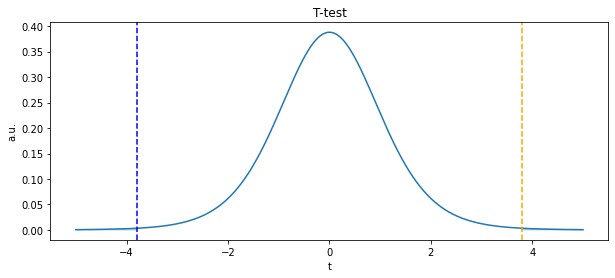

The maximum significance level at which we can accept the null hypothesis (the 'pre' and 'post' samples belong to the same distribution, i.e. the halogen lamps didn't have any effect) is  0.004302464132864614


In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#unknown population variance, estimate it from sample
sigma_1 = sqrt(np.var(pre, ddof=1))
sigma_2 = sqrt(np.var(post, ddof=1))
sigma = sqrt((sigma_1**2+sigma_2**2)/2)

pre_mean = np.mean(pre)
post_mean = np.mean(post)

n = len(pre)
T = np.abs(pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T =", T)

pvalue = 2* (1 - stats.t.cdf(T, n - 1)) #double tailed: H_0 : |t| < t* (to be set by significance level)
print("p-value =", pvalue)

fig, ax = plt.subplots(figsize=(10, 4))
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("T-test")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

print("The maximum significance level at which we can accept the null hypothesis (the 'pre' and 'post' samples belong to the same distribution, i.e. the halogen lamps didn't have any effect) is ", pvalue)


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Maximum Temperature

parameters:
 [10.58169955  0.59227423 18.14651767 27.94963531]
covariance matrix:
 [[ 1.68164542e-01 -8.58880704e-04  3.36914179e-02  6.55222867e-03]
 [-8.58880704e-04  4.48719051e-04 -1.79928035e-02  6.40276826e-03]
 [ 3.36914179e-02 -1.79928035e-02  7.26601188e-01 -2.56340890e-01]
 [ 6.55222867e-03  6.40276826e-03 -2.56340890e-01  1.83398064e-01]]
Amplitude (°C) = 10.58 +- 0.41
frequency (1/months) = 0.59 +- 0.02
initial time (months) = 18.15 +- 0.85
Temperature offset (°C) = 27.95 +- 0.43


Minimum Temperature

parameters:
 [ 25.14962092   0.60132053  17.37720567 -36.71257735]
covariance matrix:
 [[ 1.72807396e+00 -2.48382128e-04  6.73058920e-04  1.89177312e-01]
 [-2.48382128e-04  5.30720222e-04 -2.03742031e-02  1.60007003e-02]
 [ 6.73058920e-04 -2.03742031e-02  7.90945472e-01 -6.09058765e-01]
 [ 1.89177312e-01  1.60007003e-02 -6.09058765e-01  1.41861738e+00]]
Amplitude (°C) = 25.15 +- 1.31
frequency (1/months) = 0.60 +- 0.02
initial time (months) = 17.38 +- 0.8

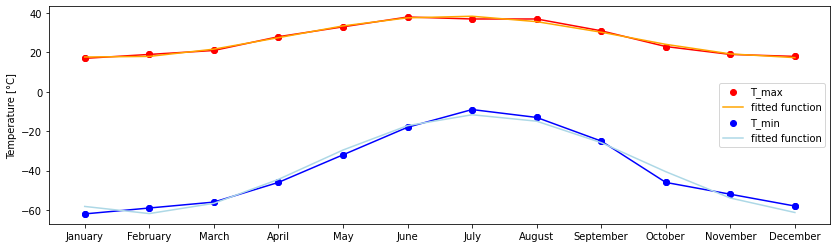

In [5]:
from scipy import optimize
import math

def f(x, A, nu, c, d): #ansatz: I'll use a periodic function
    return A * np.sin(nu *(x+c))+d

max_T = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_T = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

fig = plt.figure(figsize=(14, 4))
plt.plot(months, max_T, 'ro-', months, min_T, 'bo-')
plt.legend(('Max T', 'Min T'), loc=(1.05, 0.5))
plt.ylabel("Temperature [°C]")

#max T
popt, pcov = optimize.curve_fit(f, np.arange(0,12), max_T, p0=[10, 1, 10, 27])
print("Maximum Temperature\n")
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("Amplitude (°C) = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("frequency (1/months) = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("initial time (months) = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("Temperature offset (°C) = %.2f +- %.2f\n\n" % (popt[3], np.sqrt(pcov[3,3])))

plt.scatter(np.arange(0,12), max_T, label='T_max', color = 'red')
plt.plot(np.arange(0,12), f(np.arange(0,12), popt[0], popt[1], popt[2], popt[3]), color='orange', label='fitted function')
plt.legend(loc='best')

#min T
popt, pcov = optimize.curve_fit(f, np.arange(0,12), min_T, p0=[10, 1, 7, -40])
print("Minimum Temperature\n")
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("Amplitude (°C) = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("frequency (1/months) = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("initial time (months) = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("Temperature offset (°C) = %.2f +- %.2f\n\n" % (popt[3], np.sqrt(pcov[3,3])))


plt.scatter(np.arange(0,12), min_T, label='T_min', color = 'blue')
plt.plot(np.arange(0,12), f(np.arange(0,12), popt[0], popt[1], popt[2], popt[3]), color='lightblue', label='fitted function')
plt.legend(loc='best')


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

[ 1.1        -1.95       -7.2        ...  0.08333333  0.16666667
  0.08333333]
The dataset contains 11131 residuals
9903
A = 323.65 +- 5.27
mu = -0.09 +- 0.00
sigma = 0.22 +- 0.00


(-1.0, 1.0, 0.0, 500.0)

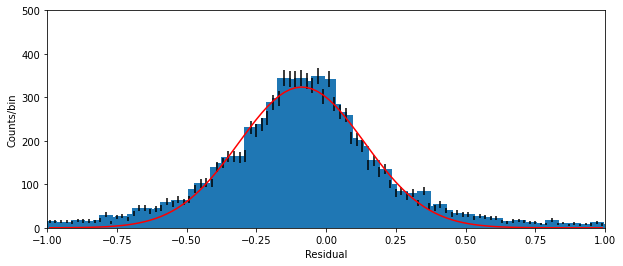

In [6]:
import pickle
import math
import pylab
from scipy import optimize

def gauss_function(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

infile = open('data/residuals_261.pkl', 'rb')
pkl = pickle.load(infile)
infile.close()

res = pkl.flatten()[0]['residuals'] #flatten the pkl array to get an array containing a dictionary, then select the correct key
print(res)
print("The dataset contains", len(res), "residuals")

filtered = np.where(np.abs(res)<1)
res_restricted = res[filtered]
print(len(res_restricted))

#fig, ax = plt.subplots(figsize=(14, 6))
#ax.hist(res, histtype='step', bins=500, density=False, linewidth=2)
#plt.axis([-5,5, 0, 6000])

fig, ax = plt.subplots(figsize=(10, 4))
y,binEdges = np.histogram(res_restricted ,bins=100)
ax.hist(res_restricted, facecolor='White')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05
pylab.bar(bincenters, y, width=width, yerr=menStd)
plt.axis([-5,5, 0, 800])
ax.set_facecolor('white')
ax.set_xlabel("Residual")
ax.set_ylabel("Counts/bin")

popt, pcov = optimize.curve_fit(gauss_function, bincenters, y, p0=[1000, 0, 1], full_output=False)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("mu = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("sigma = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

#plt.scatter(bincenters, y, label='T_min', color = 'blue')
ax.plot(bincenters, gauss_function(bincenters, popt[0], popt[1], popt[2]), color='red', label='fitted function')
plt.axis([-1,1, 0,500])
#print(binEdges)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
import pandas as pd
import datetime
from scipy import fftpack

data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')
date, temperature = data.T

fig = plt.figure(figsize=(16, 5))
plt.plot(date, temperature)
plt.ylabel("Temperature [°C]")
plt.xlabel("Date")

#clean the data with a FFT filter
sig_fft = fftpack.fft(temperature)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(temperature.size, d=0.005)
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]

# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) - peak_freq > 3] = 0
# calculate the Inverse Fast Fourier Transform
filtered_sig = fftpack.ifft(high_freq_fft)

# only take the real part
real_filtered_signal = np.real(filtered_sig)

plt.figure(figsize=(16, 5))
plt.plot(date, real_filtered_signal, linewidth=3, label='Filtered signal')
plt.ylabel("Temperature [°C]")
plt.xlabel("Date")

#define the functions
def f(x, a, b, c):
    return a*np.cos(2*math.pi*x+b)+c

def g(x, a, b, c, d):
    return a*np.cos(2*math.pi*b*x+c)+d

popt, pcov = optimize.curve_fit(f, date, temperature, p0=[10, 10, 10], full_output=False)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])),"\n")

popt, pcov = optimize.curve_fit(f, date, real_filtered_signal, p0=[10, 10, 10], full_output=False)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

plt.plot(date, f(date, popt[0], popt[1], popt[2]), color='red', label='fitted function')
plt.axis([2008,2012, -10,30])